<a href="https://colab.research.google.com/github/jppinedal/SimulacionDeSistemas/blob/main/Taller4_Simulaci%C3%B3n_de_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Semestre 2023-2S
### Taller #4
### Simulación de sistemas
### Juan Pablo Pineda Lopera


1. Simulación de Montecarlo
1.4. Tiempo para cumplir pedido

Objetivos de aprendizaje:

    Aplicar el método de la transformada inversa para generar conjuntos de observaciones de variables aleatorias discretas y continuas.

    Resolver un problema de operaciones usando simulación de Monte Carlo

Enunciado

A la farmacéutica Wozac le hicieron un pedido de 8000 onzas de su nueva droga milagrosa. Wozac planea programar su producción para cumplir con la fecha de entrega prometida de diciembre 1. Hay tres fuentes de incertidumbre que dificultan la planeación. Primero, la droga debe producirse en lotes y existe incertidumbre respecto al tiempo requerido para producir un lote, el cual puede estar entre 5 y 11 días. Esta incertidumbre se describe por la distribución discreta de la siguiente tabla.

Días: Probabilidad

5: 0.05

6: 0.10

7: 0.20

8: 0.30

9: 0.20

10: 0.10

11: 0.05

Segundo, el rendimiento (cantidad usable) de cualquier lote es incierto. Basándose en datos históricos, Wozac estima que puede modelar el rendimiento con una distribución triangular con valores mínimo, más probable y máximo iguales a 600,1000 y 1100 onzas, respectivamente.

Tercero, una vez se produzcan, todos los lotes deben superar un proceso de inspección riguroso.  La probabilidad de que un lote dado pase la inspección es sólo de 0.8. Con probabilidad de 0.2,el lote falla la inspección y NO puede usarse para satisfacer el pedido. Wozac desea usar simulación para decidir cuántos días antes de la fecha de entrega  prometida debe iniciar su producción.  
 Actividad

1. Construir un programa en Python que permita calcular el valor esperado de los días requeridos para completar el pedido.  Reportar además, el número de lotes fabricados y la cantidad aprovechable total.

2. Calcular el número de simulaciones necesarias para estimar los días para completar el pedido el primero de diciembre con un error de  1 día.

3. Con base en los resultados de la simulación, recomendar a Wozac un número de días para comenzar la fabricación del pedido y justificar la respuesta.

In [6]:
#@title 1. Construir un programa en Python que permita calcular el valor esperado de los días requeridos para completar el pedido.  Reportar además, el número de lotes fabricados y la cantidad aprovechable total.
import random
import matplotlib.pyplot as plt
import numpy as np
import math

#esta función genera un número aleatorio r y lo compara con la probabilidad
#acumulada para entregar un resultado.
def dias_lote():
    r = random.random()
    inspeccion = random.random()
    if r <= 0.05: #Probabilidad acumulada de hacer un lote en 5 días
      resu=5

    elif r<= 0.10 + 0.05:
      resu=6

    elif r<=0.20 + 0.10 + 0.05:
      resu=7

    elif r<= 0.30 + 0.20 + 0.10 + 0.05:
      resu=8

    elif r<= 0.20 + 0.30 + 0.20 + 0.10 + 0.05:
      resu=9

    elif r <= 0.10 + 0.20 + 0.30 + 0.20 + 0.10 + 0.05:
      resu= 10
    else:
      resu = 11

    if inspeccion <= 0.2:
      inspec = 0 # 20% probabilidad de no pasar la inspeccion
    else:
      inspec = 1 # 80% restante, si pasa la inspección

    return resu, inspec


def triangular(ei,moda,ed):
  a=ei
  b=ed
  c=moda
  r=random.random()
  #para x entre a y c, r=(x-a)^2/(b-a)(c-a)
  #si x=a, r=0
  #si x=c, r=(c-a)/(b-a)
  r1=(c-a)/(b-a)
  #print(r)
  if r <=r1:
    obs = a+math.sqrt(r*(b-a)*(c-a))
  else :
    obs = b-math.sqrt((1-r)*(b-a)*(b-c))
  return(obs)


In [31]:
lista_dias = []
lista_lotesTot = []
lista_efectivos = []

for i in range(100000): # Realizamos 100000 simulaciones
  lista_lotes = []
  onzas = 8000
  dias = 0
  efectivos = 0
  while onzas >= 0:
    a = dias_lote()
    lista_lotes.append(a) # Agregamos los días que nos demoramos para producir el lote y si pasa la inspección
    dias += a[0]
    if a[1] == 1:
      producido = triangular(600,1000,1100) #Cantidad producida por cada lote
      onzas -= producido
      efectivos += producido
  lista_dias.append(dias)
  lista_lotesTot.append(len(lista_lotes))
  lista_efectivos.append(efectivos)



In [43]:
# Imprimimos los resultados
print(f"Wonzac requiere {sum(lista_dias)/len(lista_dias)} días para producir su pedido") # Días en promedio gastados en producir las  8000 onzas de su droga milagrosa
print(f"Número de lotes fabricados {np.round(sum(lista_lotesTot)/len(lista_lotesTot),0)}")
print(f"Cantidad aprovechable total {sum(lista_efectivos)/len(lista_efectivos)}")

Wonzac requiere 93.69161 días para producir su pedido
Número de lotes fabricados 12.0
Cantidad aprovechable total 8433.617906824147


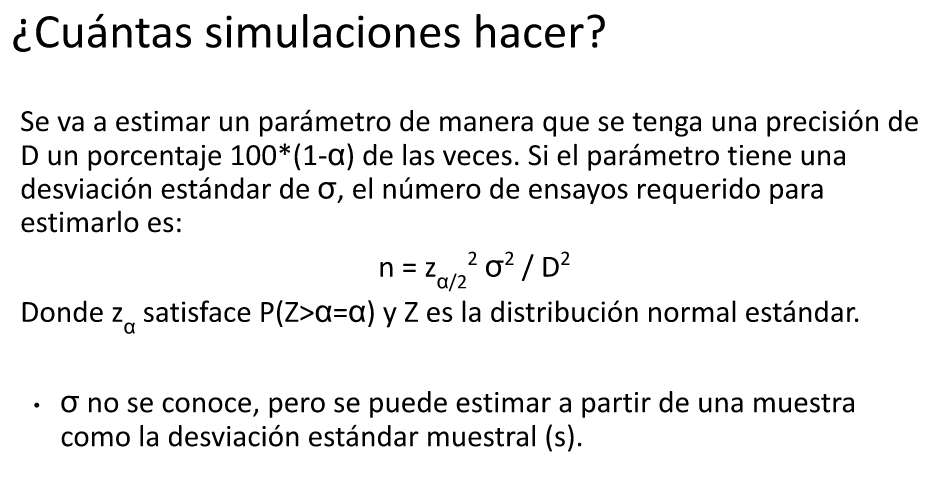

In [44]:
#@title 2. Calcular el número de simulaciones necesarias para estimar los días para completar el pedido el primero de diciembre con un error de  1 día.

# n =z_α/2^2*σ^2/D^2 (D=precisión, z_α = distribución normal,α=0.05, D = 1)

# Sacamos la desviación estandar tomando  la lista de los días como muestra
alpha = 1.96
sigma = np.std(lista_dias)
n = math.pow(alpha,2)*math.pow(sigma,2)
print(f"Cantidad mínima de simulaciones necesarias: {np.round(n,0)}") #Cantidad minima de simulaciones

Cantidad mínima de simulaciones necesarias: 907.0


3. Con base en los resultados de la simulación, recomendar a Wozac un número de días para comenzar la fabricación del pedido y justificar la respuesta.

Rta// De acuerdo a los resultados obtenidos se recomienda a Wonzac iniciar la fabricación del pedido  94 días antes de la fecha de entrega  como lo muestra el valor promedio obtenido en las 100000 simulaciones realizadas.
